# 化学反应

## 1.SMARTS创建反应

Rdkit中提供了基于SMARTS的化学反应操作，可以通过SMARTS或rxn反应文件构建反应模式，再对指定的反应物进行匹配，将匹配上的结构按反应模式进行合成。

 - 从SMARTS创建一个反应模式：Chem.ReactionFromSmarts()<br />
下面这个反应表示一个羧基，与至少带有一个氢的氮原子反应，形成酰胺
 - 定义反应物：reactants
 - 进行一个反应：RunReactants(reactants, maxProducts)<br />
对反应物依次进行反应，返回结果为一个元组

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem as Chem
rxn = Chem.ReactionFromSmarts('[C:1](=[O:2])-[OD1].[N!H0:3]>>[C:1](=[O:2])[N:3]')
reactants = (Chem.MolFromSmiles('CC(=O)O'), Chem.MolFromSmiles('NC'))
products = rxn.RunReactants(reactants)
print(len(products))

1


 - 看看反应方程式

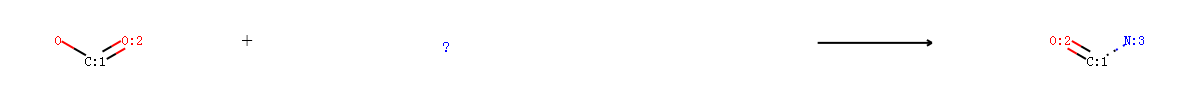

In [2]:
img = Chem.Draw.ReactionToImage(rxn, subImgSize=(300, 100))
img

In [3]:
img.save('data/chemical_reaction_1.png')

 - 元组中的每个元素（也是个元组）对应着一个产物。

1


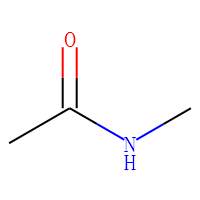

In [4]:
print(len(products[0]))
img = Chem.Draw.MolToImage(products[0][0], size=(200, 200))
img

In [5]:
img.save('data/chemical_reaction_2.png')

 - 用含两个羧基的化合物与甲胺反应，对应着两种匹配的方式，会产生两个反应结果，在不同的位置上形成了酰胺键

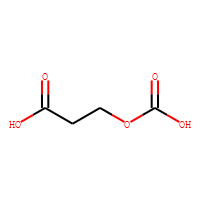

In [6]:
double = Chem.MolFromSmiles('C(COC(=O)O)C(=O)O')
Chem.Draw.MolToImage(double, size=(200, 200))

2


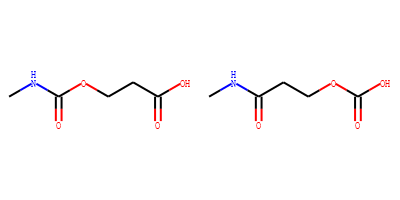

In [7]:
reacts = (double, Chem.MolFromSmiles('NC'))
ps = rxn.RunReactants(reacts)
print(len(ps))
img = Chem.Draw.MolsToGridImage([x[0] for x in ps], molsPerRow=2)
img

In [8]:
img.save('data/chemical_reaction_3.png')

## 2.rxn文件创建反应

 - 还可以通过MDL rxn文件来创建反应

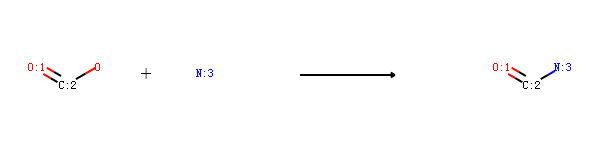

In [9]:
import os
from rdkit.Chem import RDConfig
rxn_file = os.path.join(RDConfig.RDDocsDir, 'Book\data\AmideBond.rxn')
rxn = Chem.ReactionFromRxnFile(rxn_file)
rxn

In [10]:
with open(rxn_file) as f:
    file = f.read()
# print(file)

 - 查看反应模版（反应物）数量：GetNumReactantTemplates()
 - 查看产物模版（产物）数量：GetNumProductTemplates()
 - 其他进行反应及查看产物的方法一样

In [11]:
print(rxn.GetNumReactantTemplates())
print(rxn.GetNumProductTemplates())

2
1


## 3.产物后处理

 - 做一个更复杂的反应，例如1,3丁二烯与乙烯加成反应<br />
反应物在反应模板中可以有多种映射方式，所以产生了多种产物

In [12]:
rxn = Chem.ReactionFromSmarts('[C:1]=[C:2].[C:3]=[*:4][*:5]=[C:6]>>[C:1]1[C:2][C:3][*:4]=[*:5][C:6]1')
ps = rxn.RunReactants((Chem.MolFromSmiles('OC=C'), Chem.MolFromSmiles('C=CC(N)=C')))
len(ps)

4

 - 查看一下产生的所有分子

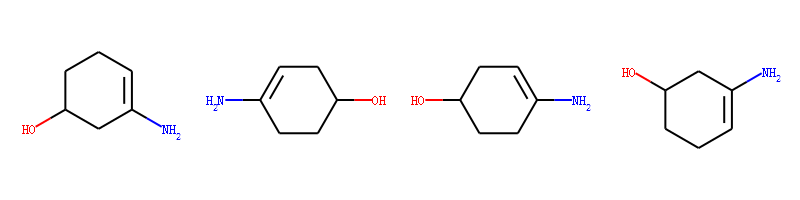

In [13]:
img = Chem.Draw.MolsToGridImage([x[0] for x in ps], molsPerRow=4)
img

In [14]:
img.save('data/chemical_reaction_4.png')

 - 或者这么看

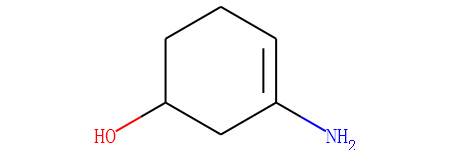

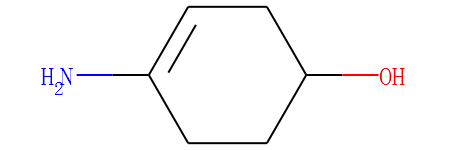

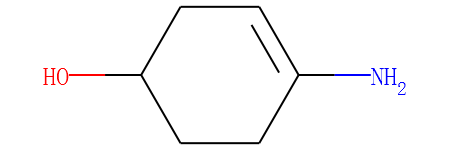

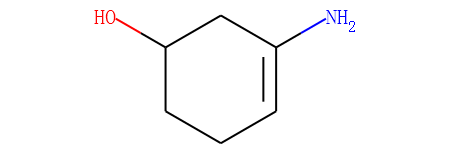

In [15]:
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import display
for p in ps:
    display(p[0])

 - 可以通过字典来获得不重复的结构

In [16]:
uniqps = {}
for p in ps:
    smi = Chem.MolToSmiles(p[0])
    uniqps[smi] = p[0]
sorted(uniqps.keys())

['NC1=CCC(O)CC1', 'NC1=CCCC(O)C1']

 - 此外，需要注意的是，通过化学反应产生的分子，是没有经过核对的，可以手动检查一下：SanitizeMol()

In [17]:
rxn = Chem.ReactionFromSmarts('[C:1]=[C:2][C:3]=[C:4].[C:5]=[C:6]>>[C:1]1=[C:2][C:3]=[C:4][C:5]=[C:6]1')
ps = rxn.RunReactants((Chem.MolFromSmiles('C=CC=C'), Chem.MolFromSmiles('C=C')))
Chem.MolToSmiles(ps[0][0])

'C1=CC=CC=C1'

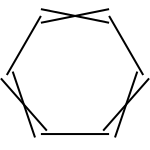

In [18]:
Chem.Draw.MolToImage(ps[0][0], size=(150, 150))

In [19]:
Chem.Draw.MolToFile(ps[0][0], 'data/chemical_reaction_5.png', size=(150, 150))

In [20]:
Chem.SanitizeMol(ps[0][0])
Chem.MolToSmiles(ps[0][0])

'c1ccccc1'